In [139]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [140]:
taxa_vazao = ctrl.Antecedent(np.arange(10, 101, 1), 'taxa_vazao')

In [141]:
minibatching = ctrl.Consequent(np.arange(0, 2050, 50), 'minibatching')

In [142]:
taxa_vazao.automf(number=5, names=['super_baixo', 'baixo', 'medio', 'alto', 'super_alto'])

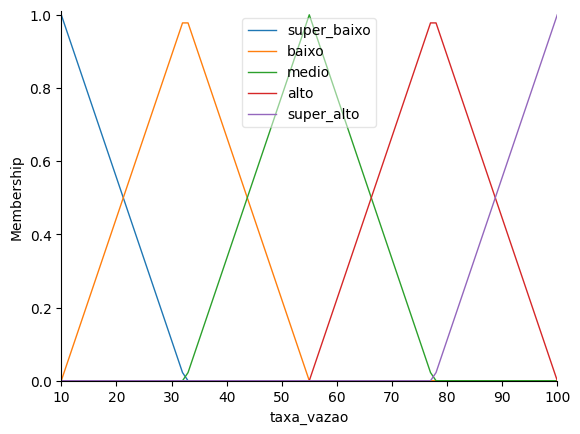

In [143]:
taxa_vazao.view()

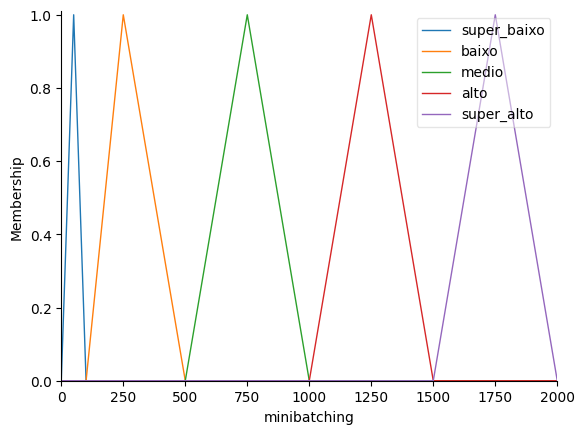

In [144]:
minibatching['super_baixo'] = fuzz.trimf(minibatching.universe, [0, 50, 100])
minibatching['baixo'] = fuzz.trimf(minibatching.universe, [100, 250, 500])
minibatching['medio'] = fuzz.trimf(minibatching.universe, [500, 750, 1000])
minibatching['alto'] = fuzz.trimf(minibatching.universe, [1000, 1250, 1500])
minibatching['super_alto'] = fuzz.trimf(minibatching.universe, [1500, 1750, 2000])

minibatching.view()

In [145]:
regra1 = ctrl.Rule(taxa_vazao['super_baixo'], minibatching['super_baixo'])
regra2 = ctrl.Rule(taxa_vazao['baixo'], minibatching['baixo'])
regra3 = ctrl.Rule(taxa_vazao['medio'], minibatching['medio'])
regra4 = ctrl.Rule(taxa_vazao['alto'], minibatching['alto'])
regra5 = ctrl.Rule(taxa_vazao['super_alto'], minibatching['super_alto'])


In [146]:
recomendacao_minibatching = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])

In [147]:
recomendacao = ctrl.ControlSystemSimulation(recomendacao_minibatching)

In [148]:
recomendacao.input['taxa_vazao'] = 100

recomendacao.compute()

1749.9999999999995


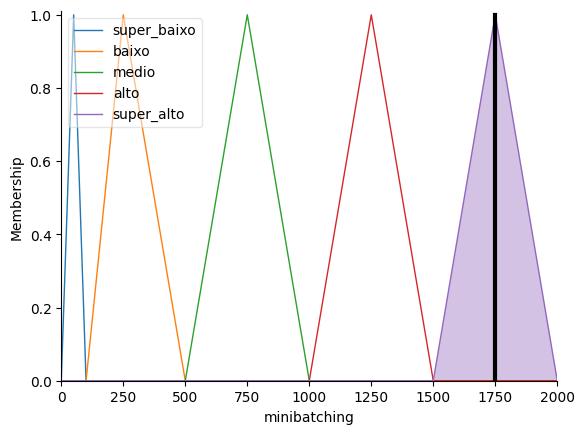

: 

In [149]:
print(recomendacao.output['minibatching'])
minibatching.view(sim = recomendacao)